In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform


In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', index_col = [0])

In [4]:
df[['dtxsid', 'group_str','final_picks']]

,dtxsid,group_str,final_picks
0,DTXSID4063036,"('Acetylides', nan)",NaN
1,DTXSID30870753,"('Acetylides', nan)",NaN
2,DTXSID7062374,"('Acetylides', nan)",NaN
3,DTXSID9061097,"('Acetylides', nan)",1.0
4,DTXSID1061233,"('Acetylides', nan)",NaN
...,...,...,...
14242,DTXSID7070391,"('Triphenyl compounds', nan)",NaN
14243,DTXSID70889405,"('Triphenyl compounds', nan)",1.0
14244,DTXSID90886794,"('Triphenyl compounds', nan)",NaN
14245,DTXSID3073052,"('Triphenyl compounds', nan)",NaN


In [5]:
atg = pd.read_csv(interim_dir+'atg-afp-tsca-full-pred.csv', )

In [6]:
atg.head()

,dtxsid,name,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,...,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS,leverage
0,DTXSID3060164,Benzhydrylbenzene,0.779710,0.078866,0.060122,0.361214,0.688947,0.690899,0.821583,0.340880,...,0.176233,0.231312,0.177881,0.402697,0.051371,0.762570,0.165442,0.355170,0.207589,0.017864
1,DTXSID7060837,"Propane, 1,3-diiodo-",0.651144,0.018653,0.016655,0.429287,0.238095,0.091101,0.023027,0.023428,...,0.162300,0.042953,0.099048,0.754526,0.009011,0.162233,0.005011,0.009590,0.014180,0.101328
2,DTXSID9025879,"3,3'-(p-Phenylene)diacrylic acid",0.565440,0.136848,0.003519,0.652231,0.391343,0.058177,0.062860,0.021602,...,0.006808,0.018646,0.863138,0.021165,0.020885,0.737458,0.038195,0.169650,0.933103,0.091227
3,DTXSID2026282,C.I. Vat brown 3,0.789356,0.178712,0.012944,0.645679,0.689697,0.755852,0.746685,0.791001,...,0.187518,0.852921,0.754918,0.073750,0.531950,0.946755,0.223314,0.802304,0.593171,0.047585
4,DTXSID4052188,"2,5,5-Trimethyl-2-phenyl-1,3-dioxane",0.604843,0.050259,0.066708,0.290074,0.337627,0.137028,0.729840,0.250290,...,0.036441,0.088665,0.037118,0.285498,0.045529,0.570865,0.087767,0.217037,0.209701,0.016739


In [10]:
atg_grp = pd.merge(atg, df[['dtxsid', 'group_str','final_picks']], on = 'dtxsid', how = 'left')

In [11]:
atg_grp.iloc[:,:-3]

,dtxsid,name,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,...,ATG_Sp1_CIS,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS
0,DTXSID3060164,Benzhydrylbenzene,0.779710,0.078866,0.060122,0.361214,0.688947,0.690899,0.821583,0.340880,...,0.483177,0.176233,0.231312,0.177881,0.402697,0.051371,0.762570,0.165442,0.355170,0.207589
1,DTXSID7060837,"Propane, 1,3-diiodo-",0.651144,0.018653,0.016655,0.429287,0.238095,0.091101,0.023027,0.023428,...,0.003062,0.162300,0.042953,0.099048,0.754526,0.009011,0.162233,0.005011,0.009590,0.014180
2,DTXSID9025879,"3,3'-(p-Phenylene)diacrylic acid",0.565440,0.136848,0.003519,0.652231,0.391343,0.058177,0.062860,0.021602,...,0.491312,0.006808,0.018646,0.863138,0.021165,0.020885,0.737458,0.038195,0.169650,0.933103
3,DTXSID2026282,C.I. Vat brown 3,0.789356,0.178712,0.012944,0.645679,0.689697,0.755852,0.746685,0.791001,...,0.836622,0.187518,0.852921,0.754918,0.073750,0.531950,0.946755,0.223314,0.802304,0.593171
4,DTXSID4052188,"2,5,5-Trimethyl-2-phenyl-1,3-dioxane",0.604843,0.050259,0.066708,0.290074,0.337627,0.137028,0.729840,0.250290,...,0.190149,0.036441,0.088665,0.037118,0.285498,0.045529,0.570865,0.087767,0.217037,0.209701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,DTXSID00893636,"(N,N-Dimethylaminopropyl)methyldiethoxysilane",0.631053,0.032380,0.016207,0.260264,0.236902,0.036656,0.169669,0.109323,...,0.478312,0.116042,0.259102,0.090047,0.025603,0.019270,0.338519,0.067139,0.064381,0.364548
13289,DTXSID9063956,Trimethyl(2-propynyloxy)silane,0.018806,0.004179,0.003564,0.122342,0.061161,0.379126,0.107435,0.078569,...,0.046961,0.023593,0.033903,0.022577,0.011265,0.070212,0.048878,0.016863,0.052459,0.017004
13290,DTXSID7065546,"2-Propenal, 3-[4-(1,1-dimethylethyl)phenyl]-2-...",0.061326,0.001785,0.001113,0.089339,0.045869,0.030168,0.013467,0.185792,...,0.029408,0.126248,0.007729,0.016017,0.077421,0.011358,0.227033,0.101900,0.116651,0.029348
13291,DTXSID5064209,2-(Carboxymethylthio)benzothiazole,0.966380,0.430258,0.270207,0.414239,0.859000,0.730816,0.976909,0.750682,...,0.868545,0.303759,0.678236,0.647581,0.396180,0.177691,0.989221,0.261848,0.590754,0.765250


In [12]:
atg_grp.to_csv(interim_dir+'atg_predicted_250424.csv')

In [13]:
atg_grp = atg_grp.set_index('dtxsid')

In [14]:
#atg_grp

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


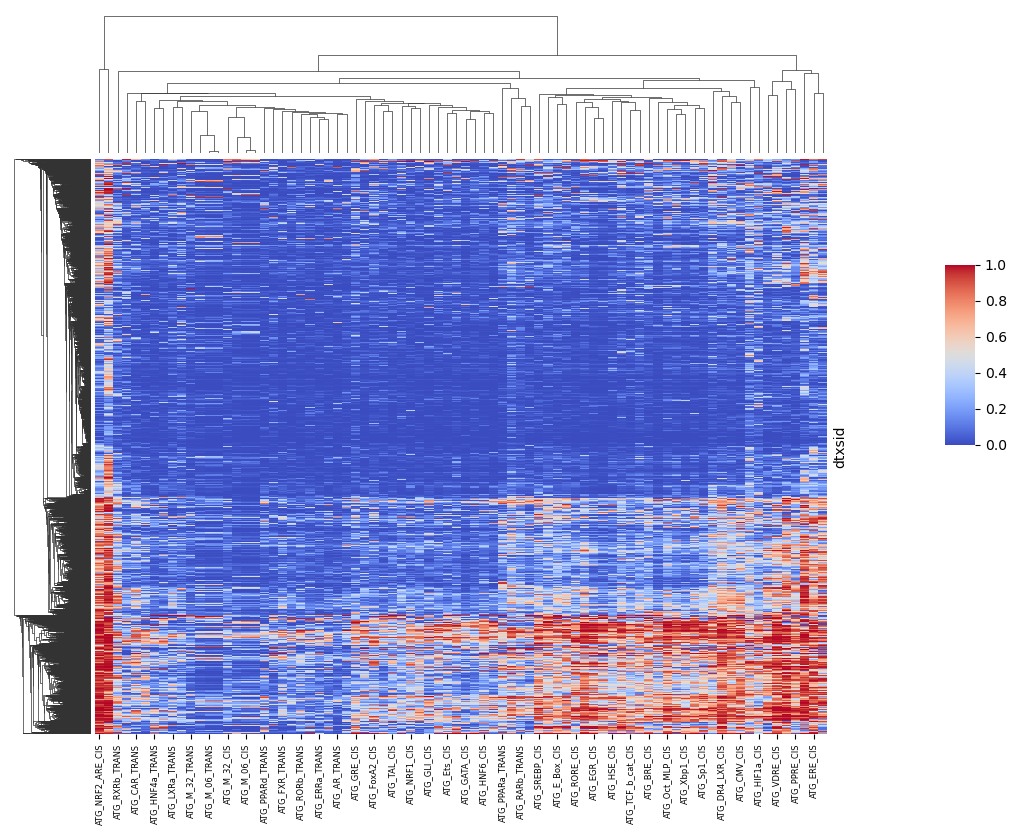

In [15]:

ax =sns.clustermap(atg_grp.iloc[:, 1:-3], cmap='coolwarm', figsize=(10, 9), linecolor = 'white',dendrogram_ratio=(.1, .2), cbar_kws={"shrink": 0.5 }, cbar_pos=(0.95, .5, .03, .2))
#ax.ax_cbar.set_ylabel("prob-hit",size=8)
ax.ax_heatmap.set_yticks([])
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(), fontsize = 6) ;
#plt.setp(ax.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8);

# Adjust font size



In [16]:
def filter_df_by_percentage_threshold(df, threshold, percentage_threshold):
    """
    Filter a DataFrame based on a given percentage threshold for a specific column.

    Args:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column to evaluate.
    - threshold (int or float): Threshold value.
    - percentage_threshold (float): Percentage threshold (between 0 and 1).

    Returns:
    - pd.DataFrame: Filtered DataFrame.
    """
    # Calculate the number of rows required to exceed the percentage threshold
    rows_threshold = df.shape[0]* percentage_threshold
   
    # Filter columns where more than a percentage of rows exceed the threshold
    filtered_cols = df.columns[df.apply(lambda x: (x > threshold).sum() > rows_threshold, axis=0)]
    filtered_df = df[filtered_cols]
   
    return filtered_cols, filtered_df


In [17]:
x, y = filter_df_by_percentage_threshold(atg_grp.iloc[:,1:-3], 0.5,0.5)

In [18]:
mydict = {}
mylst = []
for e in list(np.arange(0.1, 1, 0.1)):
    a, b = filter_df_by_percentage_threshold(atg_grp.iloc[:,1:-3], 0.5,e)
    mydict[e] = a

In [19]:
[len(e) for e in mylst]

[]

In [20]:
{k:len(v) for k,v in mydict.items()}

{0.1: 48,
 0.2: 22,
 0.30000000000000004: 8,
 0.4: 4,
 0.5: 2,
 0.6: 1,
 0.7000000000000001: 0,
 0.8: 0,
 0.9: 0}

In [21]:
chk = mydict[0.30000000000000004].tolist()

In [22]:
atg_grp.where(atg_grp['ATG_THRa1_TRANS'] > 0.6)[['group_str']].dropna()['group_str'].value_counts()[:3].index.tolist()

["('Benzene and substituted derivatives', 8.0)",
 "('Benzene and substituted derivatives', 2.0)",
 "('Carboxylic acids and derivatives', 1.0)"]

In [23]:
top_cats = {}
for e in chk:
    a = atg_grp.where(atg_grp[e] > 0.6)[['group_str']].dropna()['group_str'].value_counts()[:5].index.tolist()
    top_cats[e] = a
    

In [24]:
top_cat = pd.DataFrame(list(top_cats.items()))

In [25]:
top_cat = top_cat.explode(1)

# Explode the 'Values' column
top_cat.columns = ['Assay', 'Terminal_Category']
top_cat

,Assay,Terminal_Category
0,ATG_DR4_LXR_CIS,"('Benzene and substituted derivatives', 8.0)"
0,ATG_DR4_LXR_CIS,"('Benzene and substituted derivatives', 2.0)"
0,ATG_DR4_LXR_CIS,"('Prenol lipids', 2.0)"
0,ATG_DR4_LXR_CIS,"('Fatty Acyls', 1.0)"
0,ATG_DR4_LXR_CIS,"('Benzene and substituted derivatives', 10.0)"
1,ATG_ERE_CIS,"('Benzene and substituted derivatives', 2.0)"
1,ATG_ERE_CIS,"('Benzene and substituted derivatives', 8.0)"
1,ATG_ERE_CIS,"('Prenol lipids', 2.0)"
1,ATG_ERE_CIS,"('Fatty Acyls', 1.0)"
1,ATG_ERE_CIS,"('Organooxygen compounds', 3.0)"


In [26]:
top_cat.to_csv(external_dir+'toxcast_cats.csv')

In [27]:
top_cat['Terminal_Category'].unique()

array(["('Benzene and substituted derivatives', 8.0)",
       "('Benzene and substituted derivatives', 2.0)",
       "('Prenol lipids', 2.0)", "('Fatty Acyls', 1.0)",
       "('Benzene and substituted derivatives', 10.0)",
       "('Organooxygen compounds', 3.0)"], dtype=object)

In [20]:
import glob

In [22]:
files = glob.glob(external_dir+'*OPERA*.csv', 
                   recursive = True)


In [23]:
mylst = []
for e in files:
    df = pd.read_csv(e)
    mylst.append(df)
    

In [25]:
opera = pd.concat(mylst)

In [29]:
[e for e in opera.columns if 'pred'  in e]

['FUB_pred',
 'FUB_predRange',
 'Clint_pred',
 'Clint_predRange',
 'CACO2_pred',
 'CACO2_predRange',
 'CERAPP_Ago_pred',
 'CERAPP_Anta_pred',
 'CERAPP_Bind_pred',
 'CoMPARA_Ago_pred',
 'CoMPARA_Anta_pred',
 'CoMPARA_Bind_pred',
 'CATMoS_VT_pred',
 'CATMoS_NT_pred',
 'CATMoS_EPA_pred',
 'CATMoS_GHS_pred',
 'CATMoS_LD50_pred',
 'CATMoS_LD50_predRange']

In [34]:
opera_df = opera[['MoleculeID','CERAPP_Ago_pred',
 'CERAPP_Anta_pred',
 'CERAPP_Bind_pred',
 'CoMPARA_Ago_pred',
 'CoMPARA_Anta_pred',
 'CoMPARA_Bind_pred',
 'CATMoS_VT_pred',
 'CATMoS_NT_pred',
 'CATMoS_EPA_pred',
 'CATMoS_GHS_pred',
 'CATMoS_LD50_pred']]

In [36]:
opera_df = pd.merge(opera_df, df[['dtxsid', 'group_str','final_picks']], left_on = 'MoleculeID', right_on = 'dtxsid', how = 'left')

In [41]:
opera_df.to_csv(interim_dir+'opera_df_tox.csv')

<Axes: ylabel='Frequency'>

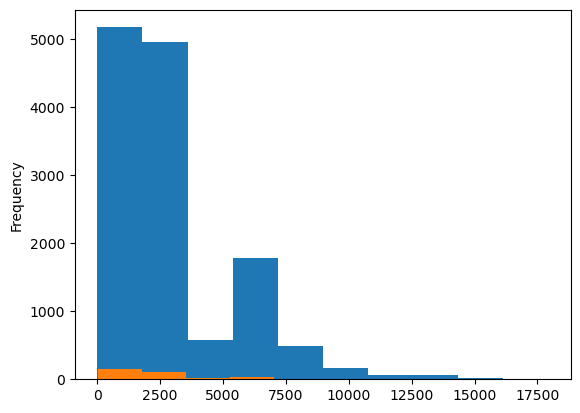

In [40]:
opera_df['CATMoS_LD50_pred'].plot(kind = 'hist')
opera_df[opera_df['final_picks'] ==1]['CATMoS_LD50_pred'].plot(kind = 'hist')